Load in basic libraries.

In [38]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.pyplot import *
##import Queue, pyaudio 
import pyaudio
import queue as Queue
from scipy import signal
from numpy import *
%matplotlib inline

## Explore the python fft function

In [39]:
# Show the help for the fft function
np.fft.fft?

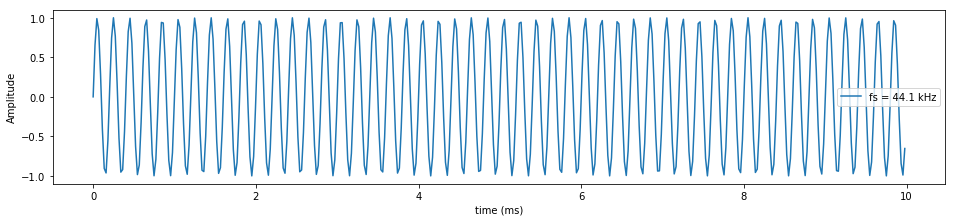

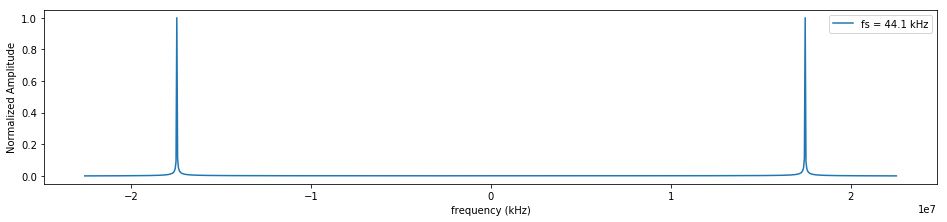

In [44]:
from __future__ import division
# Create sinusoidal signal
t = np.r_[0:2:(1/44100)]
sig = np.sin(2*np.pi*5000*t)

# Perform FFT and create frequency axis
sigfft = np.fft.fft(sig, 1024 )
freq = np.r_[0:1024] # note this is not quite correct
freq = np.r_[-512:512]
freq = freq *(44100);
# the code below is interesting, but it is better to create your own frequency axis.
# freq = np.fft.fftfreq(1024, 1/44100)

# Plot the signal and its FFT
# Plot the signal 
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
# stem plot
#plt.stem(t[0:441]*1000,sig[0:441])
# continuous plot
plt.plot(t[0:441]*1000,sig[0:441])
plt.legend(("fs = 44.1 kHz",""))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot the FFT of the signal
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq,abs(sigfft)/np.max(abs(sigfft)))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 44.1 kHz",""))


## Things to explain and change
### 1. In the example above we used a stem plot. Please comment this out and uncomment the continuous plot. 
### 2. Explain briefly why the continuous plot is easier to interpret - despite the fact it is sampled and a stem plot should be ok.
### 3. Explain why 10 ms corresponds to 441 samples
### 4. The FFT plot has the wrong frequency axis. Please fix it by modifying the code above.
### 5. The FFT plot of a real signal is redundant - explain.
### 6. Modify the FFT plot so that we only show the frequencies up to the Nyquist frequency.
### 7. Numpy provides a FFT frequency function. Comment your frequency axis code and uncomment the freq axis defined using the numpy fftfreq function. Plot the FFT using the numpy freq axis. 
### 8. Explain very, very carefully what happened with the FFT plot using the numpy fftfreq function. 


## Define the play_audio function

In [32]:
def play_audio( Q, p, fs , dev=None):
    # play_audio plays audio with sampling rate = fs
    # Q - A queue object from which to play
    # p   - pyAudio object
    # fs  - sampling rate
    # dev - device number
    
    # Example:
    # fs = 44100
    # p = pyaudio.PyAudio() #instantiate PyAudio
    # Q = Queue.queue()
    # Q.put(data)
    # Q.put("EOT") # when function gets EOT it will quit
    # play_audio( Q, p, fs,1 ) # play audio
    # p.terminate() # terminate pyAudio
    
    # open output stream
    ostream = p.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),output=True,output_device_index=dev)
    # play audio
    while (1):
        data = Q.get()
        if data is "EOT" :
            break
        try:
            ostream.write( data.astype(np.float32).tostring() )
        except:
            break

## Sample Sinusoidal Signals
### Case 1: 5 kHz sampled with 72 kHz - this will be our reference

([<matplotlib.axis.XTick at 0x1f3632bf7b8>,
 <a list of 11 Text xticklabel objects>)

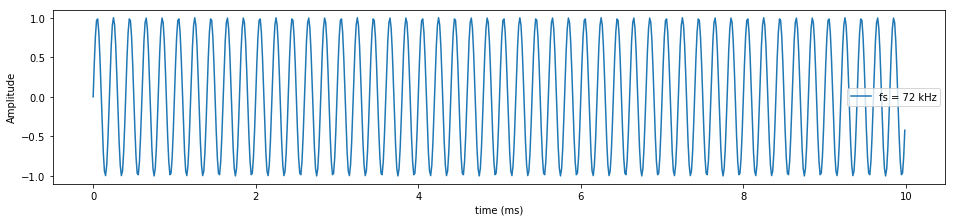

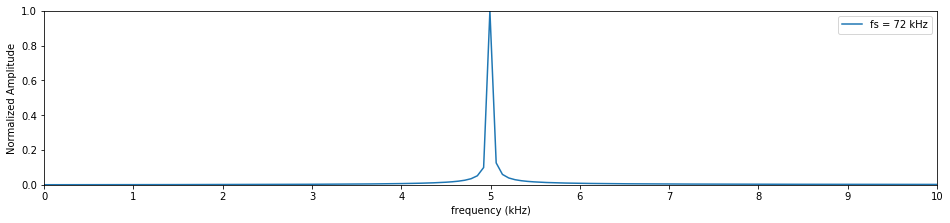

In [33]:
from __future__ import division
fs = [72000, 24000, 12000, 8000, 6000]

# Case 1: 5 kHz sampled with 72 kHz
# Create signal
t1 = np.r_[0:2:(1/fs[0])]
sig1 = np.sin(2*np.pi*5000*t1)

# Perform FFT and create frequency axis
sig1fft = np.fft.fft(sig1, 1024 )
freq1 = np.r_[0:1024]*(fs[0]/1024)

# Plot the signal 
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(t1[0:720]*1000,sig1[0:720])
plt.legend(("fs = 72 kHz",""))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot the FFT of the signal
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq1[0:513]/1000,abs(sig1fft[0:513])/np.max(abs(sig1fft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 72 kHz",""))
plt.axis([0,10,0,1])
plt.xticks(np.arange(0,10+1,1))

## Play the reference signal

In [34]:
Qout = Queue.Queue()
Qout.put( sig1 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[0])
p.terminate()

## Repeat with different sample rates and compare to the reference
### Case 2: 5 kHz sample with 24 kHz

([<matplotlib.axis.XTick at 0x1f36326c208>,
 <a list of 11 Text xticklabel objects>)

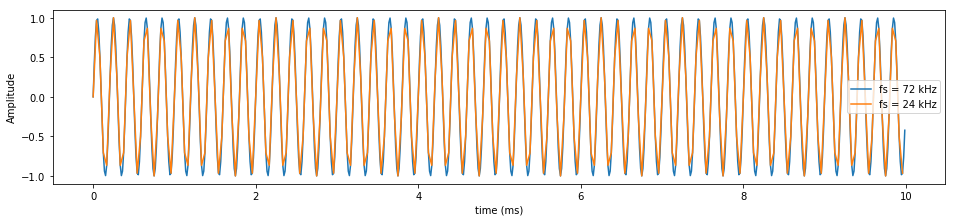

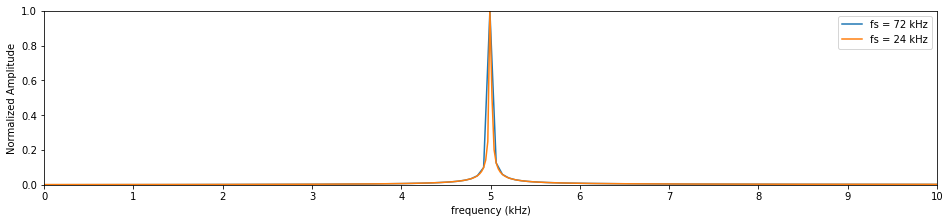

In [35]:
from __future__ import division
fs = [72000, 24000, 12000, 8000, 6000]

# Case 1: 5 kHz sampled with 24 kHz
# Create signal
t2 = np.r_[0:2:(1/fs[1])]
sig2 = np.sin(2*np.pi*5000*t2)

# Perform FFT and create frequency axis
sig2fft = np.fft.fft(sig2, 1024 )
freq2 = np.r_[0:1024]*(fs[1]/1024)

# Plot new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))

plt.plot(t1[0:720]*1000,sig1[0:720])
plt.plot(t2[0:240]*1000,sig2[0:240])
plt.legend(("fs = 72 kHz","fs = 24 kHz"))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot FFT of new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq1[0:513]/1000,abs(sig1fft[0:513])/np.max(abs(sig1fft[0:513])))
plt.plot(freq2[0:513]/1000,abs(sig2fft[0:513])/np.max(abs(sig2fft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 72 kHz","fs = 24 kHz"))
plt.axis([0,10,0,1])
plt.xticks(np.arange(0,10+1,1))


## Play the new signal and the reference signal

In [36]:
# Reference
Qout = Queue.Queue()
Qout.put( sig1 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[0])
p.terminate()

In [37]:
# New 
Qout = Queue.Queue()
Qout.put( sig2 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[1])
p.terminate()

# Your Turn
## Case 3:  5 kHz sampled at 12 kHz
### Add your code below similar to case 2. 
#### Generate the new signal, compute its FFT, plot the new signal with the reference signal, plot the fft of the signal and compare with the reference signal.
#### Play both the reference signal and the new signal. Provide a brief written explanation for what you observe.

## Case 4:  5 kHz sampled at 8 kHz
### Add your code below similar to case 2. 
#### Generate the new signal, compute its FFT, plot the new signal with the reference signal, plot the fft of the signal and compare with the reference signal.
#### Play both the reference signal and the new signal. Provide a brief written explanation for what you observe.

## Case 5:  5 kHz sampled at 6 kHz
### Add your code below similar to case 2. 
#### Generate the new signal, compute its FFT, plot the new signal with the reference signal, plot the fft of the signal and compare with the reference signal.
#### Play both the reference signal and the new signal. Provide a brief written explanation for what you observe.